In [1]:
import pandas as pd

from src.opynfield.config.user_input import UserInput
from src.opynfield.readin.run_all import run_all_track_types
from src.opynfield.config.defaults_settings import Defaults
from src.opynfield.config.cov_asymptote import CoverageAsymptote
from src.opynfield.calculate_measures.calculate_measures import tracks_to_measures
from src.opynfield.summarize_measures.summarize_individuals import individual_measures_to_dfs
from src.opynfield.summarize_measures.summarize_groups import time_average, cov_measure_average,\
    percent_coverage_average
from src.opynfield.config.model_settings import set_up_fits
from src.opynfield.fit_models.fit_individual_models import fit_all, find_fit_bounds, re_fit_all
from src.opynfield.fit_models.fit_group_models import group_fit_all
from src.opynfield.stat_test.stat_test import format_params, format_group_params, run_tests
from copy import deepcopy

In [2]:
# create your user config settings
user_config = UserInput({'Canton S': ['Buridian Tracker'], 'Canton S 2': ['Buridian Tracker']},
                        {'Canton S': 'CS1', 'Canton S 2': 'CS2'}, 4.2, 30, 1, 1, 0.001, True,
                        '/Users/ellenmcmullen/Desktop/TestRunResults')
user_config.prep_directory()
# read in the data
track_list = run_all_track_types(user_config.groups_and_types, user_config.verbose, user_config.arena_radius_cm,
                                 user_config.running_window_length, user_config.window_step_size,
                                 user_config.sample_freq, user_config.time_bin_size, user_config.trim)
# set the default parameters (or override)
test_defaults = Defaults()
# identify functional form for PICA and PGCA (or override)
test_cov_asymptote = CoverageAsymptote()
# calculate measures from track data
standard_tracks, tracks_by_groups = tracks_to_measures(track_list, user_config, test_defaults, test_cov_asymptote)
individual_measures_dfs = individual_measures_to_dfs(tracks_by_groups, test_defaults, user_config)
# calculate group averages of measures
time_averages = time_average(individual_measures_dfs, test_defaults, user_config)
group_measures_by_coverage = cov_measure_average(individual_measures_dfs, test_defaults, user_config, 'coverage')
group_measures_by_pica = cov_measure_average(individual_measures_dfs, test_defaults, user_config, 'pica')
group_measures_by_pgca = cov_measure_average(individual_measures_dfs, test_defaults, user_config, 'pgca')
group_measures_by_percent_coverage = percent_coverage_average(individual_measures_dfs, test_defaults, user_config)
# set up model fit defaults
model_params = set_up_fits()
# fit initial models on individual track data
fits = fit_all(individual_measures_dfs, test_defaults, model_params)
# change bounds based on the distribution of the parameters
fit_upper_bounds, fit_lower_bounds, fit_initial_params = find_fit_bounds(fits, user_config)
# refit the models on individual track data with the bounds
bounded_fits = re_fit_all(individual_measures_dfs, test_defaults, model_params, fit_upper_bounds, fit_lower_bounds,
                          fit_initial_params)
# fit group models with the bounds
group_fits = group_fit_all(individual_measures_dfs, test_defaults, model_params, fit_upper_bounds, fit_lower_bounds,
                           fit_initial_params)
# format the bounded_fits to do statistical tests
formatted_bounded_fits = format_params(deepcopy(bounded_fits), test_defaults, user_config)
# format the group fits to save out
formatted_group_fits = format_group_params(deepcopy(group_fits), test_defaults, user_config)
run_tests(formatted_bounded_fits, test_defaults, user_config)

['Buridian Tracker']
{'Buridian Tracker': ['Canton S', 'Canton S 2']}
Read In Buridian Tracker Files For Groups ['Canton S', 'Canton S 2']
Running Buridian Tracker Files For Group: Canton S


2023-06-05 11:09:02.489 python[80923:27955217] +[CATransaction synchronize] called within transaction
2023-06-05 11:09:08.597 python[80923:27955217] +[CATransaction synchronize] called within transaction


Canton S, File 1 Out Of 55
Buri Units Converted
Buri Units Centered
Buri Track Smoothed
Buri Track Subsampled
Buri Track Missing Values Filled
Canton S, File 2 Out Of 55
Buri Units Converted
Buri Units Centered
Buri Track Smoothed
Buri Track Subsampled
Buri Track Missing Values Filled
Canton S, File 3 Out Of 55
Buri Units Converted
Buri Units Centered
Buri Track Smoothed
Buri Track Subsampled
Buri Track Missing Values Filled
Canton S, File 4 Out Of 55
Buri Units Converted
Buri Units Centered
Buri Track Smoothed
Buri Track Subsampled
Buri Track Missing Values Filled
Canton S, File 5 Out Of 55
Buri Units Converted
Buri Units Centered
Buri Track Smoothed
Buri Track Subsampled
Buri Track Missing Values Filled
Canton S, File 6 Out Of 55
Buri Units Converted
Buri Units Centered
Buri Track Smoothed
Buri Track Subsampled
Buri Track Missing Values Filled
Canton S, File 7 Out Of 55
Buri Units Converted
Buri Units Centered
Buri Track Smoothed
Buri Track Subsampled
Buri Track Missing Values Filled

2023-06-05 11:09:38.383 python[80923:27955217] +[CATransaction synchronize] called within transaction
2023-06-05 11:09:45.707 python[80923:27955217] +[CATransaction synchronize] called within transaction


Canton S 2, File 1 Out Of 55
Buri Units Converted
Buri Units Centered
Buri Track Smoothed
Buri Track Subsampled
Buri Track Missing Values Filled
Canton S 2, File 2 Out Of 55
Buri Units Converted
Buri Units Centered
Buri Track Smoothed
Buri Track Subsampled
Buri Track Missing Values Filled
Canton S 2, File 3 Out Of 55
Buri Units Converted
Buri Units Centered
Buri Track Smoothed
Buri Track Subsampled
Buri Track Missing Values Filled
Canton S 2, File 4 Out Of 55
Buri Units Converted
Buri Units Centered
Buri Track Smoothed
Buri Track Subsampled
Buri Track Missing Values Filled
Canton S 2, File 5 Out Of 55
Buri Units Converted
Buri Units Centered
Buri Track Smoothed
Buri Track Subsampled
Buri Track Missing Values Filled
Canton S 2, File 6 Out Of 55
Buri Units Converted
Buri Units Centered
Buri Track Smoothed
Buri Track Subsampled
Buri Track Missing Values Filled
Canton S 2, File 7 Out Of 55
Buri Units Converted
Buri Units Centered
Buri Track Smoothed
Buri Track Subsampled
Buri Track Missing

In [23]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

In [70]:
individual_measures_dfs['Canton S']['activity']

,Group,0,1,2,3,4,5,6,7,8,...,597,598,599,600,601,602,603,604,605,606
0,Canton S,0.343623,0.510383,1.593137,0.764583,0.090956,0.025713,0.000147,0.047666,0.078463,...,0.006459,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Canton S,1.376457,1.732201,1.840567,2.326886,2.152896,2.079557,2.339593,1.544260,1.603335,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Canton S,1.153163,0.675699,1.326146,0.526574,1.720233,1.591763,1.170532,1.410137,1.352129,...,0.000209,0.006785,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Canton S,0.334750,0.348236,0.533765,0.139659,0.972211,0.651040,0.931330,1.649238,0.980476,...,0.003948,0.009510,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canton S,1.202762,1.472042,0.652772,2.389483,1.547956,2.271777,0.454686,1.837913,1.644874,...,0.013535,0.004179,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Canton S,1.014040,0.856079,1.414066,0.813508,1.365760,0.953320,1.125408,1.094898,1.077026,...,0.000000,0.025825,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Canton S,1.715182,2.432948,1.648602,1.910161,0.232023,0.330011,1.143905,0.740725,0.939486,...,0.000000,0.004695,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Canton S,0.468454,0.456378,0.430792,1.259051,1.779055,1.087666,2.010609,1.916331,1.181463,...,0.057746,0.057746,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Canton S,0.054545,0.000000,0.007510,5.495667,0.621551,0.616338,0.009937,0.000000,0.000000,...,0.002630,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Canton S,2.298431,2.263470,1.725536,1.510637,1.474917,0.692896,1.000221,0.632480,0.462820,...,0.008244,0.004674,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
a =bounded_fits['Canton S']['coverage']['p_zero_zero_given_zero'].reset_index().drop(columns='index').iloc[3].values

In [91]:
np.isnan(a[0])

True

In [21]:
model_params

{'time': {'activity': ModelSpecification(axes=('time', 'activity'), model=ExponentialModel(initial_params=(0.1, -0.1, 0.01), bounds=((0, -10, 0), (10, 0, 10)), max_eval=4000)),
  'coverage': ModelSpecification(axes=('time', 'coverage'), model=FixedExponentialModel(initial_params=(-0.1, -0.1), bounds=((-10, -10), (0, 0)), max_eval=4000)),
  'percent_coverage': ModelSpecification(axes=('time', 'percent_coverage'), model=FixedExponentialModel(initial_params=(-0.1, -0.1), bounds=((-10, -10), (0, 0)), max_eval=4000)),
  'pica': ModelSpecification(axes=('time', 'pica'), model=FixedExponentialModel(initial_params=(-0.1, -0.1), bounds=((-10, -10), (0, 0)), max_eval=4000)),
  'pgca': ModelSpecification(axes=('time', 'pgca'), model=FixedExponentialModel(initial_params=(-0.1, -0.1), bounds=((-10, -10), (0, 0)), max_eval=4000)),
  'p_plus_plus': ModelSpecification(axes=('time', 'p_plus_plus'), model=ExponentialModel(initial_params=(0.1, -0.1, 0.01), bounds=((0, -10, 0), (10, 0, 10)), max_eval=4000

In [67]:
def plot_individual(i: int, x: str, y: str, group: str, measures: dict[str, dict[str, pd.DataFrame]],
                    params: dict[str, dict[str, dict[str, pd.DataFrame]]],
                    model_info: dict[str, dict[str, pd.DataFrame]]):
    y_plot = measures[group][y].iloc[i].values[1:]
    if x == 'time':
        x_plot = np.arange(0, len(y_plot))
    else:
        x_plot = measures[group][x].iloc[i].values[1:]
    plt.scatter(x_plot, y_plot)
    return

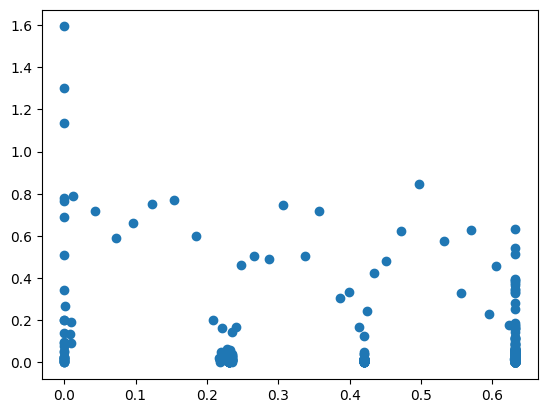

In [68]:
plot_individual(0, 'coverage', 'activity', 'Canton S', individual_measures_dfs, 1, 1)

In [77]:
type(individual_measures_dfs['Canton S']['activity'].iloc[0][1:].values)

numpy.ndarray

In [78]:
type(np.arange(len(individual_measures_dfs['Canton S']['activity'].iloc[0][1:].values)))

numpy.ndarray